In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [28]:
row_data=pd.read_csv("Categorical.csv")
row_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [29]:
data=row_data.copy()
data['continent']=data['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


In [30]:
x=data.iloc[:,3:4]
x

,continent
0,0
1,2
2,3
3,0
4,1
...,...
236,5
237,2
238,3
239,3


In [31]:
#clustering
kmeans=KMeans(7)#try with 7 ,5,4,3
kmeans.fit(x)


KMeans(n_clusters=5)

In [32]:
classified_cluster=kmeans.fit_predict(x)
classified_cluster

array([1, 3, 0, 1, 4, 4, 4, 3, 0, 3, 2, 2, 2, 2, 1, 2, 4, 3, 0, 4, 0, 0,
       3, 4, 3, 1, 1, 4, 1, 4, 1, 1, 0, 0, 1, 3, 3, 0, 0, 4, 0, 3, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 3, 3, 4, 4, 0, 1, 4, 1, 0, 0, 0, 0,
       4, 4, 0, 4, 2, 0, 4, 4, 2, 0, 4, 3, 4, 0, 0, 0, 0, 0, 4, 1, 1, 1,
       2, 0, 3, 2, 1, 4, 1, 4, 3, 4, 3, 3, 2, 4, 3, 3, 4, 3, 4, 1, 4, 3,
       3, 3, 3, 0, 3, 3, 2, 1, 3, 4, 3, 3, 3, 0, 0, 1, 4, 3, 0, 4, 4, 4,
       3, 1, 0, 4, 4, 0, 2, 1, 2, 4, 0, 4, 3, 4, 3, 2, 0, 0, 1, 2, 0, 3,
       0, 2, 0, 2, 0, 1, 2, 4, 4, 3, 2, 2, 3, 3, 1, 2, 0, 3, 2, 2, 4, 1,
       3, 4, 0, 3, 2, 3, 4, 4, 0, 0, 3, 0, 0, 0, 3, 2, 2, 2, 0, 1, 4, 0,
       0, 1, 4, 0, 0, 4, 4, 4, 0, 1, 2, 3, 1, 0, 0, 3, 3, 3, 3, 2, 1, 0,
       3, 3, 0, 0, 4, 0, 1, 3, 4, 1, 0, 1, 1, 3, 2, 2, 2, 3, 0, 0, 0])

In [33]:
data_with_cluster=data.copy()
data_with_cluster['cluster']=classified_cluster
data_with_cluster

,name,Longitude,Latitude,continent,cluster
0,Aruba,-69.982677,12.520880,0,1
1,Afghanistan,66.004734,33.835231,2,3
2,Angola,17.537368,-12.293361,3,0
3,Anguilla,-63.064989,18.223959,0,1
4,Albania,20.049834,41.142450,1,4
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,2
237,Yemen,47.586762,15.909280,2,3
238,South Africa,25.083901,-29.000341,3,0
239,Zambia,27.774759,-13.458242,3,0


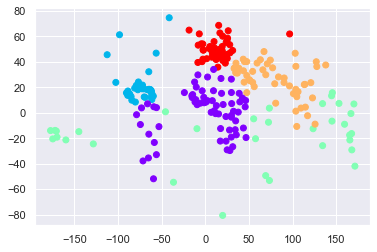

In [34]:
plt.scatter(data['Longitude'],data['Latitude'],c=data_with_cluster['cluster'],cmap='rainbow')
plt.show()